<a href="https://colab.research.google.com/github/KipkiruiCloud/colab-notebook/blob/main/Ensemble_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import the dataset
data = pd.read_csv("/content/bank-full.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [6]:
# this column is not at all relevent according the info on the dataset
data.drop('duration', axis=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,1.0,-1.0,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12735,59,management,married,tertiary,no,553.0,yes,no,cellular,7.0,jul,3.0,-1.0,0.0,unknown,yes
12736,31,admin.,single,secondary,no,92.0,yes,no,cellular,7.0,jul,2.0,-1.0,0.0,unknown,no
12737,42,blue-collar,divorced,unknown,no,0.0,no,no,cellular,7.0,jul,2.0,-1.0,0.0,unknown,no
12738,45,blue-collar,divorced,primary,no,1805.0,no,no,cellular,7.0,jul,1.0,-1.0,0.0,unknown,no


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        12740 non-null  int64  
 1   job        12739 non-null  object 
 2   marital    12739 non-null  object 
 3   education  12739 non-null  object 
 4   default    12739 non-null  object 
 5   balance    12739 non-null  float64
 6   housing    12739 non-null  object 
 7   loan       12739 non-null  object 
 8   contact    12739 non-null  object 
 9   day        12739 non-null  float64
 10  month      12739 non-null  object 
 11  duration   12739 non-null  float64
 12  campaign   12739 non-null  float64
 13  pdays      12739 non-null  float64
 14  previous   12739 non-null  float64
 15  poutcome   12739 non-null  object 
 16  Target     12739 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 1.7+ MB


In [8]:
data.count()

,0
age,12740
job,12739
marital,12739
education,12739
default,12739
balance,12739
housing,12739
loan,12739
contact,12739
day,12739


In [9]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,12740.000000,12739.000000,12739.000000,12739.000000,12739.000000,12739.0,12739.0
mean,40.687127,1182.210927,15.291153,256.067666,2.831619,-1.0,0.0
std,9.419616,2635.786054,8.460659,256.562321,3.393142,0.0,0.0
min,3.000000,-3372.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,33.000000,48.000000,7.000000,105.000000,1.000000,-1.0,0.0
50%,39.000000,387.000000,15.000000,181.000000,2.000000,-1.0,0.0
75%,48.000000,1263.000000,21.000000,315.000000,3.000000,-1.0,0.0
max,61.000000,58544.000000,30.000000,3881.000000,63.000000,-1.0,0.0


In [10]:
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' nan]
marital
['married' 'single' 'divorced' nan]
education
['tertiary' 'secondary' 'unknown' 'primary' nan]
default
['no' 'yes' nan]
housing
['yes' 'no' nan]
loan
['no' 'yes' nan]
contact
['unknown' 'cellular' 'telephone' nan]
month
['may' 'jun' 'jul' nan]
poutcome
['unknown' nan]
Target
['no' 'yes' nan]


In [11]:
for col in data.select_dtypes(include='int').columns:
    print(col)
    print(data[col].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20  3]


In [12]:
# lets clean up the data a bit

In [13]:
# dropping unknowns & other
df = data[~data.isin(['unknown']).any(axis=1)]

In [14]:
df= data.drop('duration', axis=1)

In [15]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' nan]
marital
['married' 'single' 'divorced' nan]
education
['tertiary' 'secondary' 'unknown' 'primary' nan]
default
['no' 'yes' nan]
housing
['yes' 'no' nan]
loan
['no' 'yes' nan]
contact
['unknown' 'cellular' 'telephone' nan]
month
['may' 'jun' 'jul' nan]
poutcome
['unknown' nan]
Target
['no' 'yes' nan]


In [16]:
# lets explore the categorical columns in the data
cat_features = df.select_dtypes(include=['object']).columns.tolist()

In [17]:
# here we can see the features and the number of categories per feature
for feature in cat_features:
    print('Feature {} | Category Numbers {}'.format(feature, len(df[feature].unique())))

Feature job | Category Numbers 13
Feature marital | Category Numbers 4
Feature education | Category Numbers 5
Feature default | Category Numbers 3
Feature housing | Category Numbers 3
Feature loan | Category Numbers 3
Feature contact | Category Numbers 4
Feature month | Category Numbers 4
Feature poutcome | Category Numbers 2
Feature Target | Category Numbers 3


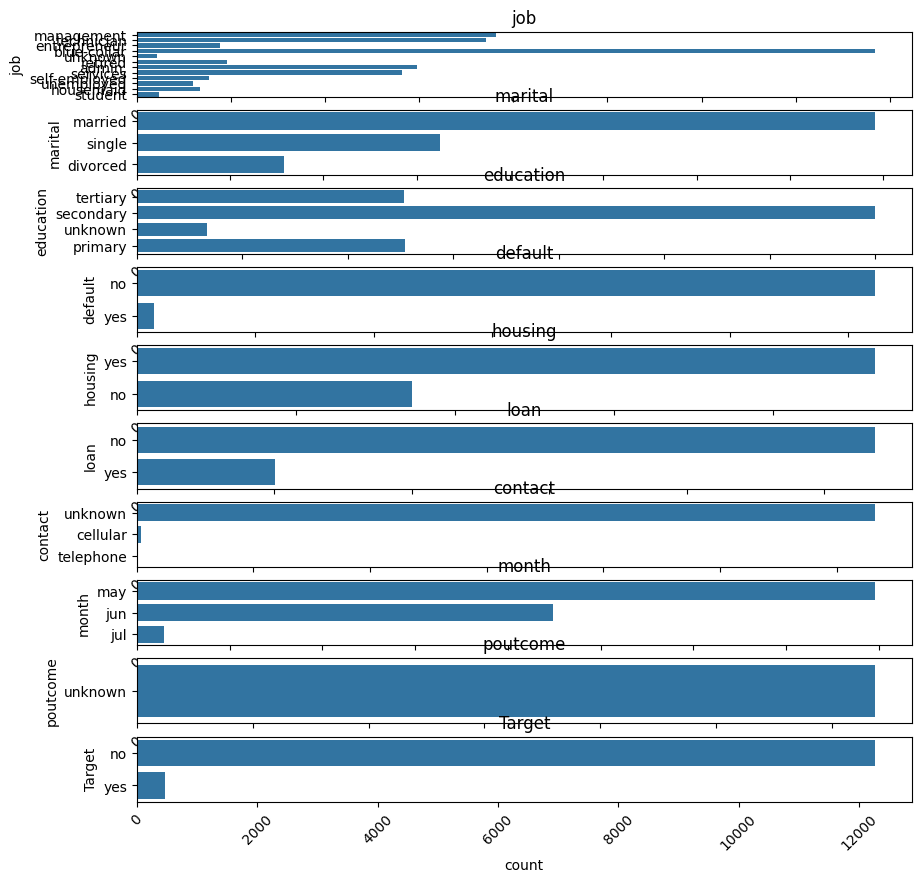

In [18]:
# lets explore the distribution of catagorical features
plt.figure(figsize=(10, 10))
plotnumber = 1
for i, feature in enumerate(cat_features):
    plt.subplot(len(cat_features), 1, i+1)
    sns.countplot(y=feature, data=df)
    plt.title(feature)
    plt.xticks(rotation=45)
    plotnumber =+1
plt.tight_layout(h_pad=5, w_pad=5)
plt.show()

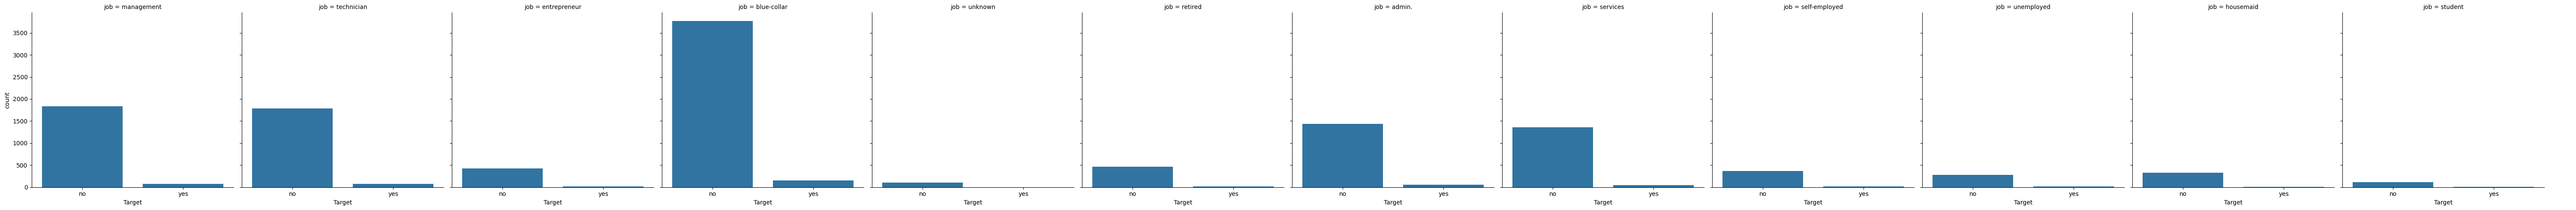

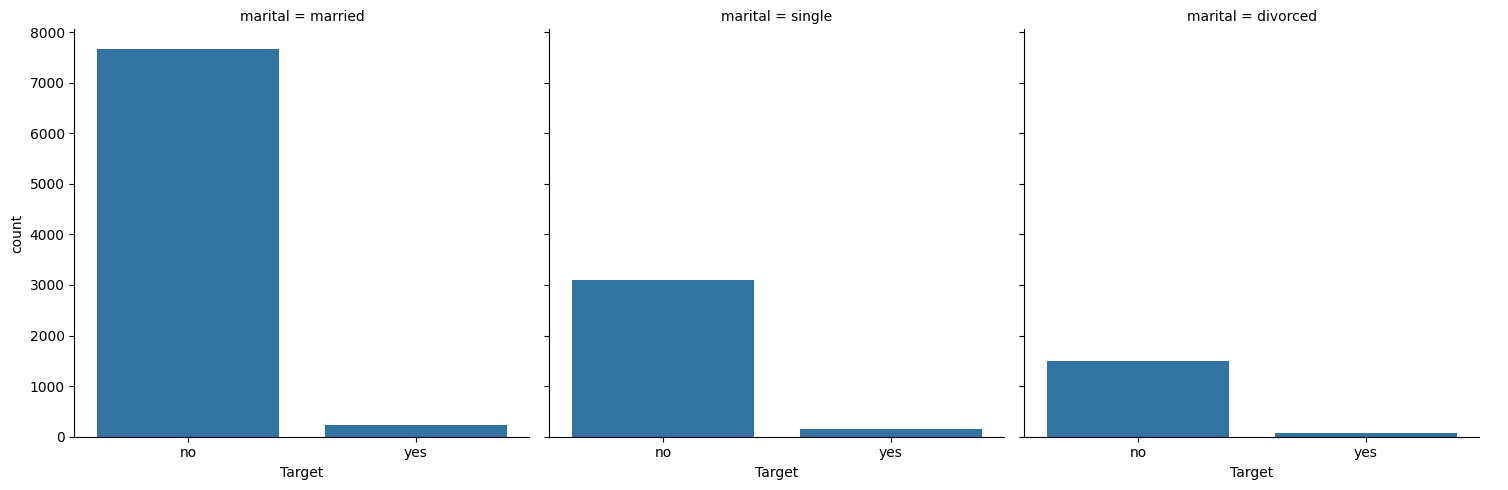

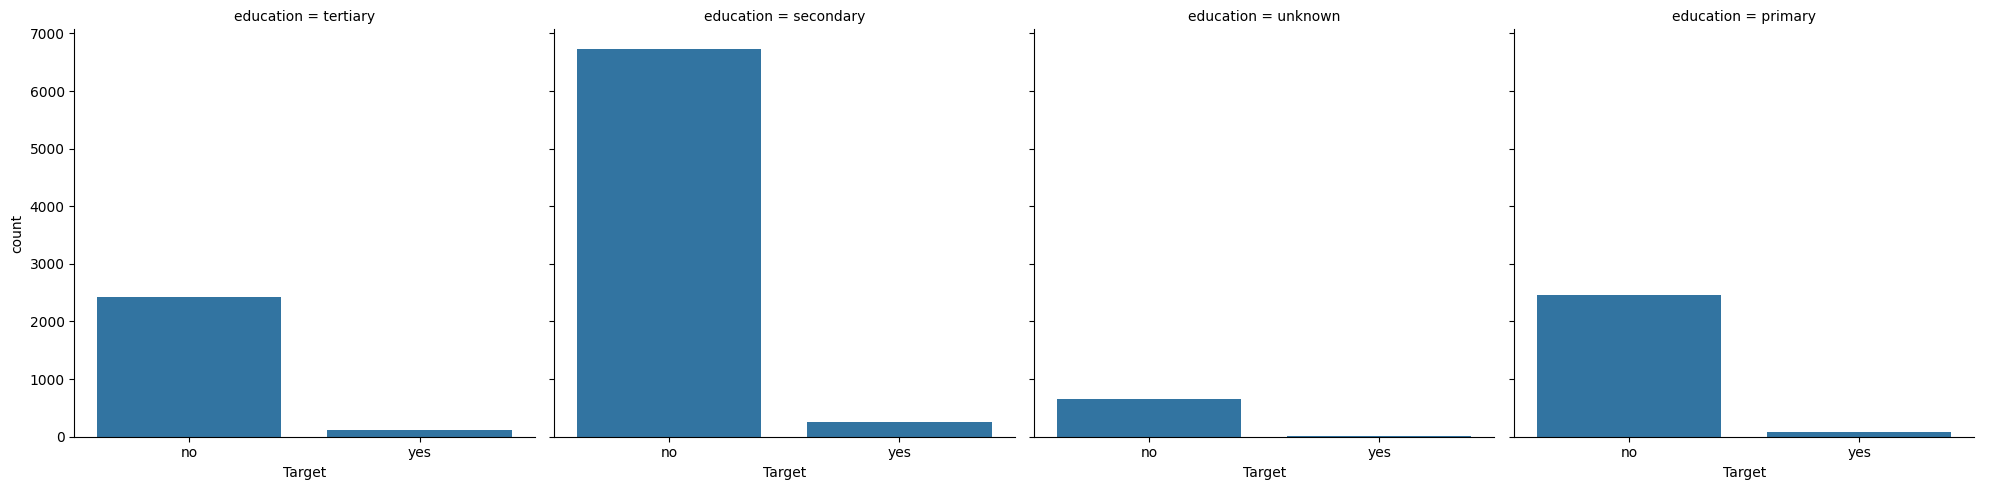

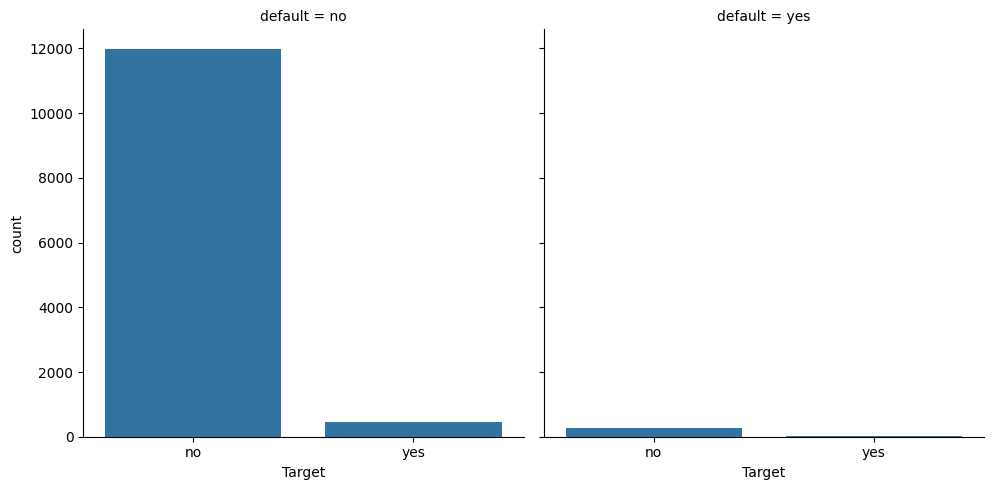

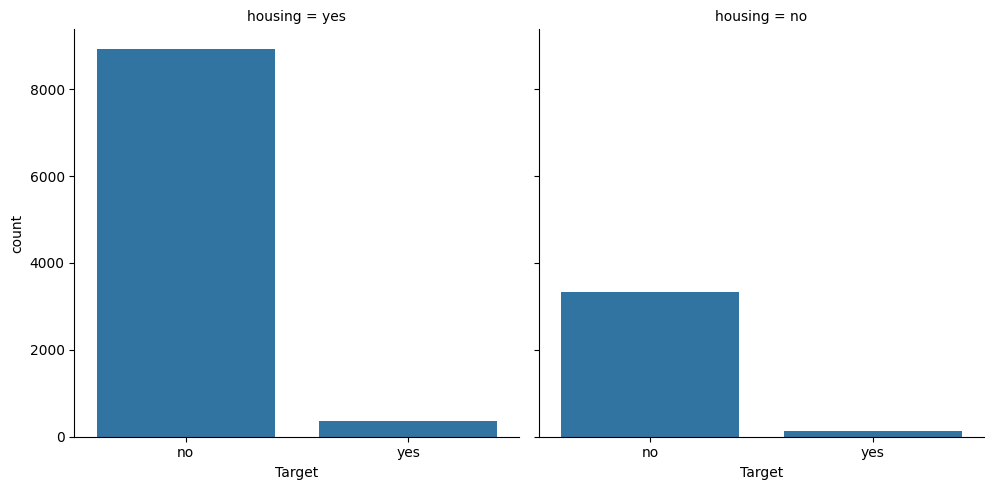

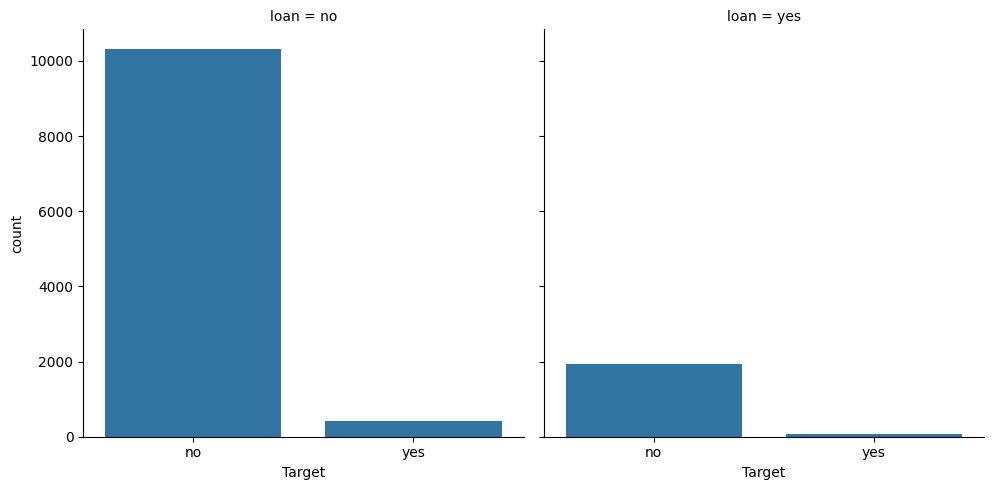

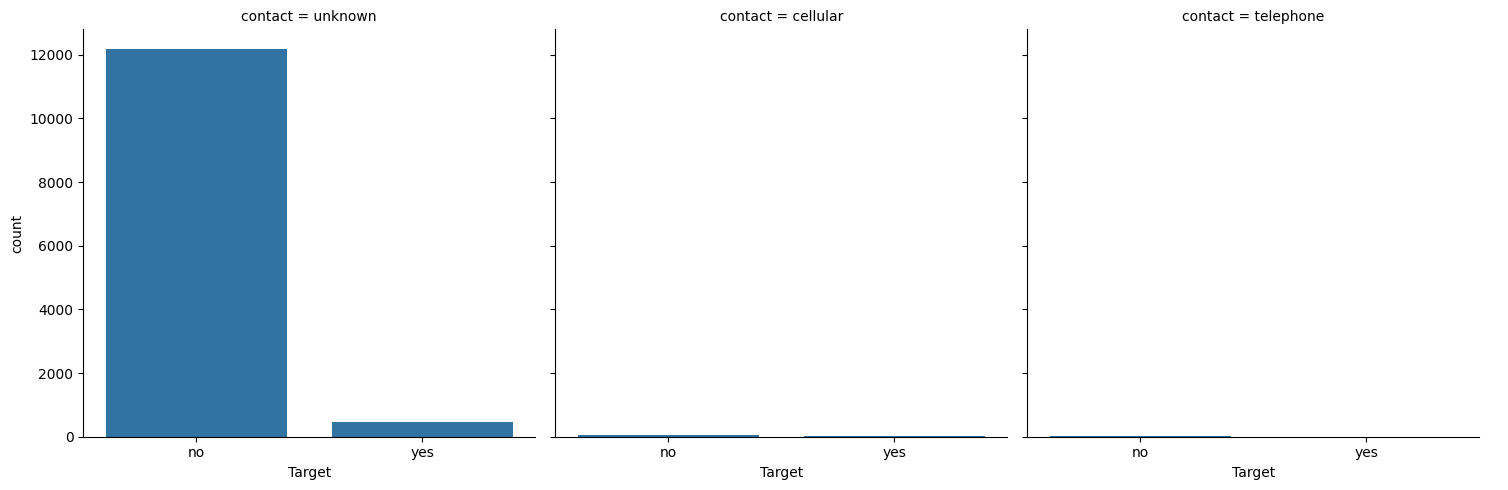

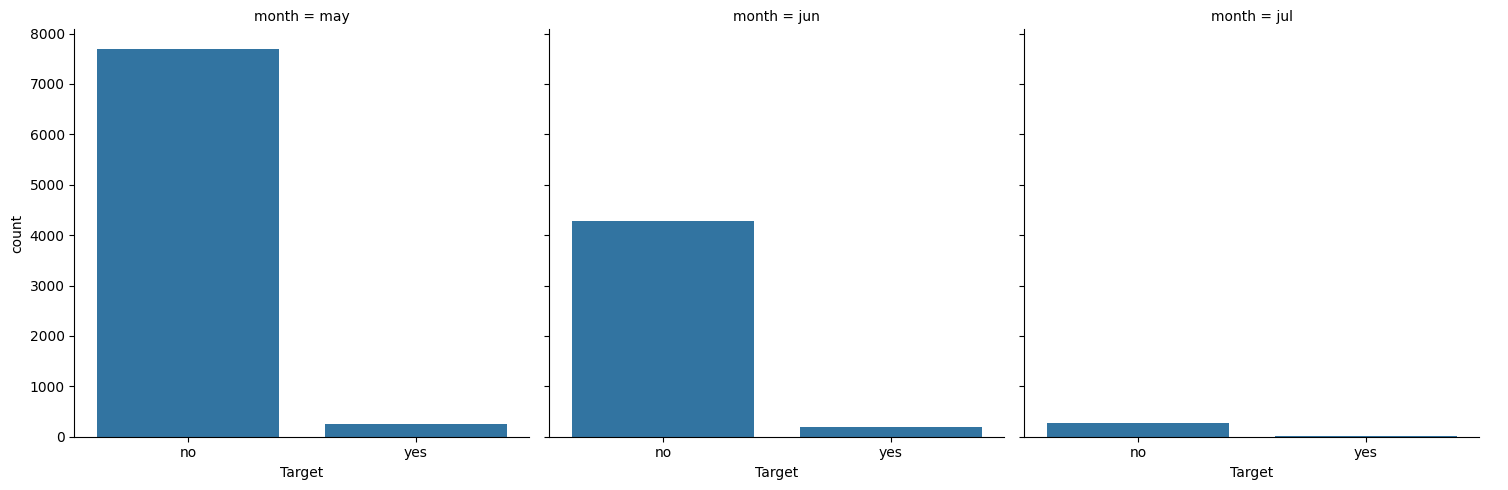

In [ ]:
# lets examine the distribution of the targe tvariable w respect to the categorical features
for feature in cat_features:
    sns.catplot(x='Target', col=feature, kind='count', data=df)
plt.show()

In [ ]:
# now lets look at the numerical data

In [ ]:
num_features = df.select_dtypes(include=['int']).columns.tolist()

In [ ]:
for feature in num_features:
    print('Feature {} | Category Numbers {}'.format(feature, len(df[feature].unique())))

In [ ]:
# lets explore the distribution of continous features
plt.figure(figsize=(20, 70))
for i, feature in enumerate(num_features):
    ax = plt.subplot(12, 3, i+1)
    sns.distplot(df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

In [ ]:
# now lets see the distribution of the targe tvariable w respect to the numerical features
for feature in num_features:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x='Target', y=feature, data=df)
    plt.xlabel('Target')
    plt.ylabel(feature)
    plotnumber+=1
    plt.title(f'Distribution of {feature} by Target')
    plt.tight_layout()
    plt.show()

In [ ]:
# lets identify any outliers in the numerical data via boxplots
plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1
for feature in num_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(y=df[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
# lets see if the data is balanced based on the target variable
sns.countplot(x='Target', data=df)
plt.title('Count of each Target category')
plt.show()
print(df['Target'].value_counts())

In [ ]:
# there is definately an imbalance w the target variable

In [ ]:
# lets move onto feature selection & make a new df for further use
df2= df.copy()

In [ ]:
# initialzie the encoder for the categorical features
encoder = LabelEncoder()

In [ ]:
# encode cat features
for feature in cat_features:
    df2[feature] = encoder.fit_transform(df2[feature])

In [ ]:
df2.head()

In [ ]:
# now lets calculate the information gain to find the best split
X= df2.drop('Target', axis=1)
y= df2['Target']

In [ ]:
# by using mutual_info_classif the entropy  calculation prior to the info gain calculation is automatically handled
# so we can move on to calculating the ID3
info_gain = mutual_info_classif(X, y)

In [ ]:
# create df to associate feature names with their info gain scores
feature_info_gain = pd.DataFrame({'Feature': X.columns, 'Information_Gain': info_gain})

# rank the features
feature_info_gain = feature_info_gain.sort_values(by='Information_Gain', ascending=False)

In [ ]:
print("Feature Ranking (Information Gain):")
print(feature_info_gain)

In [ ]:
# above we can see which features have the highest information gain for our decision tree

In [ ]:
# selecting the features w the highest info gain
selected_features = ['poutcome', 'pdays', 'month']
X = df2[selected_features]
y = df2['Target']

In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size =0.2 , random_state = 1000)

In [ ]:
# create and train the decision tree classifier
model = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=20, min_samples_leaf=3)
model.fit(X_train, y_train)

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
y_pred

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Create kNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the model
knn_model.fit(X_train, y_train)

In [ ]:
# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
bag_model = BaggingClassifier(
    DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5),
    n_estimators=100,
    random_state=100
)

In [ ]:
bag_model.fit(X_train, y_train)
y_pred_bag = bag_model.predict(X_test)

In [ ]:
accuracy_bag = accuracy_score(y_test, y_pred_bag)
print(f"Random Forest Accuracy: {accuracy_bag}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# first lets create a random forest classifier
# we can balance the weights here too
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=5,
    random_state=100,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# lets try boosting too
b_model = AdaBoostClassifier(
    DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5),
    n_estimators=100,
    random_state=100
)
b_model.fit(X_train, y_train)

In [ ]:
y_pred_b = b_model.predict(X_test)

In [ ]:
accuracy_b = accuracy_score(y_test, y_pred_b)
print(f"AdaBoost Accuracy: {accuracy_b}")

In [ ]:
# lets evaluate all the models
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# bagging classifier
print(confusion_matrix(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

In [ ]:
# boosting
print(confusion_matrix(y_test, y_pred_b))
print(classification_report(y_test, y_pred_b))

In [ ]:
# random forest
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

In [ ]:
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# initialize the models with default parameters
model_1 = knn_model
model_2 = rf_model
model_3 = bag_model
model_4 = b_model

In [ ]:
final_model = VotingClassifier(
    estimators=[
        ('knn', knn_model),
        ('rf', rf_model),
        ('bag', bag_model),
        ('boost', b_model)
    ],
    voting='soft'
)

In [ ]:
final_model.fit(x_train_smote, y_train_smote)

In [ ]:
pred_final = final_model.predict(X_test)

In [ ]:
score = accuracy_score(y_test, pred_final)
print(f"Accuracy Score: {score:.4f}")